# Welcome to my Tutorial Notebook
* I am supper excited to share with you guys the results of new insights for the data preparation and building two models such as:
*  Regression using SKLearn's Neural Network (NN)
* Train unisng Keras API with Tensorflow as Backend

# Kaggle Bike Sharing Demand Dataset
Modified 'count' to log1p(count) for training

Log can be used when target represents a count (that is non-negative values)

Model now predicts as log1p(count). We need to convert it back to actual count using expm1(predicted_target)



Input Features: ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']
Target Feature: [log1p('count')]

Objective: We are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period (Ref: Kaggle.com)

# In this Notebook, we will go through some steps and different insights such as:
# Contains
# Regression using SKLearn's Neural Network (NN)
* Data Underestanding
* Data Visualization
* Data Preparation:
 1. One Hot Encode all the Categorical Features
 2. Standardize or Normalize all the Numeric Features
* Train using SKLearn's MLPRegressor (Multi-Layer Perceptron)/Regression using SKLearn's Neural Network (NN)
* Prediction
* Evaluating the Results
* Submission
# New Insight for Modeling
# Train unisng Keras API with Tensorflow as Backend
* Data Underestanding
* Data Visualization
* Data Preparation:
 1. One Hot Encode all the Categorical Features
 2. Standardize or Normalize all the Numeric Features
* Train unisng Keras API with Tensorflow as Backend
* Prediction
* Evaluating the Results
* Submission



In [1]:
#Let's import the Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Example
# Converts to log1p(count)
# Print original count back using expm1
print('Test log and exp')
test_count = 100
print('original value', test_count)
x = np.log1p(test_count) # log (x+1)
print('log1p', x)
print('expm1', np.expm1(x)) # exp(x) - 1

Test log and exp
original value 100
log1p 4.61512051684126
expm1 100.00000000000003


In [3]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']

In [4]:
#loading the datasets
df = pd.read_csv('../input/bike-sharing-demand/train.csv', parse_dates=['datetime'],index_col=0)
df_test = pd.read_csv('../input/bike-sharing-demand/test.csv', parse_dates=['datetime'],index_col=0)

In [5]:
# We need to convert datetime to numeric for training.
# Let's extract key features into separate numeric columns
def add_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

In [6]:
add_features(df)
add_features(df_test)

* Data Visualization

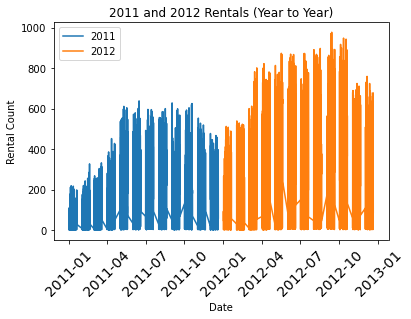

In [7]:
plt.plot(df['2011']['count'],label='2011')
plt.plot(df['2012']['count'],label='2012')
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.legend()
plt.show()

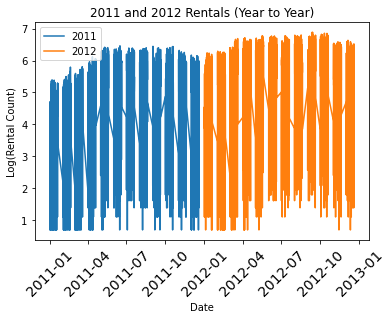

In [8]:
plt.plot(df['2011']['count'].map(np.log1p),label='2011')
plt.plot(df['2012']['count'].map(np.log1p),label='2012')
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Log(Rental Count)')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.legend()
plt.show()

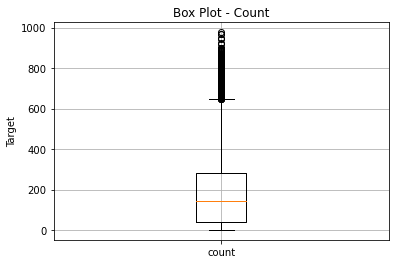

In [9]:
plt.boxplot([df['count']], labels=['count'])
plt.title('Box Plot - Count')
plt.ylabel('Target')
plt.grid(True)

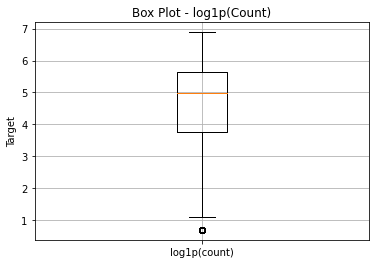

In [10]:
# Let's see how the data distribution changes with log1p
# Evenly distributed
plt.boxplot([df['count'].map(np.log1p)], labels=['log1p(count)'])
plt.title('Box Plot - log1p(Count)')
plt.ylabel('Target')
plt.grid(True)

In [11]:
df["count"] = df["count"].map(np.log1p)

In [12]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4


In [13]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [14]:
df.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count         float64
year            int64
month           int64
day             int64
dayofweek       int64
hour            int64
dtype: object

In [15]:
# Save all data
df.to_csv('bike_all.csv',index=True,index_label='datetime',columns=columns)

# Training and Validation Set
* Target Variable as first column followed by input features
* Training, Validation files do not have a column header

In [16]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.loc[l]

In [17]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows-train

In [18]:
rows, train, test

(10886, 7620, 3266)

In [19]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [20]:
# Write Training Set
df.iloc[:train].to_csv('bike_train.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [21]:
# Write Validation Set
df.iloc[train:].to_csv('bike_validation.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [22]:
# Test Data has only input features
df_test.to_csv('bike_test.csv',index=True,index_label='datetime')

In [23]:
print(','.join(columns))

count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour


In [24]:
# Write Column List
with open('bike_train_column_list.txt','w') as f:
    f.write(','.join(columns))

# Regression using SKLearn's Neural Network (NN)
* One-Hot Encode categorical features, Standardize numeric features
* Objective:

* Train a bike rental prediction model
* NN requires one hot encoding of categorical data
* NN also requires features to be on similar scale
* Perform one-hot encoding of all categorical features: ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'dayofweek', 'hour']
* Verify model performance

In [25]:
import sys
import numpy as np
# Set random seed
np.random.seed(0)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# NN
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, KBinsDiscretizer
# Column Transformer
from sklearn.compose import ColumnTransformer

In [26]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

# One Hot Encoding

In [27]:
# One Hot Encode all Categorical Features
# Let's define all the categorical features
categorical_features = ['season','holiday','workingday','weather','year','month','dayofweek','hour']

# Standardize Features
standardize_features = ['temp', 'atemp', 'humidity', 'windspeed']

In [28]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [29]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [30]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [31]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [32]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [33]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [34]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [35]:
# Features to one-hot encode
categorical_features+['day']

['season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'dayofweek',
 'hour',
 'day']

In [36]:
# Features to standardize
standardize_features

['temp', 'atemp', 'humidity', 'windspeed']

# Column Transformer/New Idea 
* Chain all data transformations
* Easy and straight forward

In [37]:
colTransformer = ColumnTransformer([('onehot',
                                     OneHotEncoder(categories='auto',sparse=False),
                                     categorical_features),
                                    ('onehotday',
                                     OneHotEncoder(categories=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
                                                   sparse=False),
                                     ['day']),
                                    ('standardize',
                                    StandardScaler(),standardize_features)
                                   ],
                                   remainder="passthrough")

In [38]:
colTransformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(sparse=False),
                                 ['season', 'holiday', 'workingday', 'weather',
                                  'year', 'month', 'dayofweek', 'hour']),
                                ('onehotday',
                                 OneHotEncoder(categories=[[1, 2, 3, 4, 5, 6, 7,
                                                            8, 9, 10, 11, 12,
                                                            13, 14, 15, 16, 17,
                                                            18, 19, 20, 21, 22,
                                                            23, 24, 25, 26, 27,
                                                            28, 29, 30, ...]],
                                               sparse=False),
                                 ['day']),
                                ('standardize', StandardScaler(),
                                 ['t

In [39]:
X_train_encoded = colTransformer.transform(X_train)
X_validation_encoded = colTransformer.transform(X_validation)

In [40]:
print('Training Data',X_train.shape, 'OneHot Encoded',X_train_encoded.shape)
print('Val Data',X_validation.shape, 'OneHot Encoded',X_validation_encoded.shape)

Training Data (7620, 13) OneHot Encoded (7620, 92)
Val Data (3266, 13) OneHot Encoded (3266, 92)


In [41]:
X_train_encoded[:1]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [42]:
X_validation_encoded[:1]

array([[0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

# Train a neural network regressor

In [43]:
nn_regressor = MLPRegressor(random_state=5, 
                            hidden_layer_sizes=[100],
                            activation='relu',
                            max_iter=100)

In [44]:
nn_regressor

MLPRegressor(hidden_layer_sizes=[100], max_iter=100, random_state=5)

In [45]:
%%time
nn_regressor.fit(X_train_encoded,y_train)

CPU times: user 10.1 s, sys: 123 ms, total: 10.2 s
Wall time: 5.16 s


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(hidden_layer_sizes=[100], max_iter=100, random_state=5)

In [46]:
# Compare actual vs predicted performance with dataset not seen by the model before
df = pd.read_csv(validation_file,names=columns)

In [47]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [48]:
result = nn_regressor.predict(X_validation_encoded)

In [49]:
result[:5]

array([6.15758232, 5.93196715, 1.27710594, 3.91617107, 3.77289797])

In [50]:
df['count_predicted'] = result

In [51]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,6.157582
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,5.931967
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,1.277106
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,3.916171
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,3.772898


In [52]:
df['count_predicted'].describe()

count    3266.000000
mean        4.560944
std         1.394138
min         0.386789
25%         3.763872
50%         4.945768
75%         5.605207
max         6.879171
Name: count_predicted, dtype: float64

In [53]:
# Convert log(count) to count
df['count'] = df['count'].map(np.expm1)
df['count_predicted'] = df['count_predicted'].map(np.expm1)

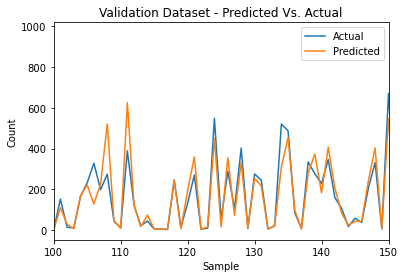

In [54]:
# Actual Vs Predicted
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

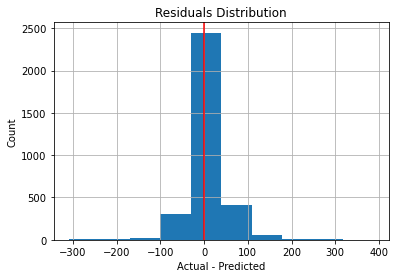

In [55]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [56]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.59
 Over  Estimation: 0.41


In [57]:
import sklearn.metrics as metrics
print("RMSE: {0:.2f}".format(metrics.mean_squared_error(df['count'],
                                                    df['count_predicted'])**.5))

RMSE: 43.48


In [58]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [59]:
print("RMSLE: {0:.2f}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE: 0.29


# Submission

In [60]:
# Optional Test Data
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [61]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [62]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [63]:
# Transform data first with column transformer
result = nn_regressor.predict(colTransformer.transform(X_test))

In [64]:
# Convert result to actual count
df_test["count"] = np.expm1(result)

In [65]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,4.562644
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,2.719617
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,1.433917
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,0.653550
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,0.615454


In [66]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
27,2011-01-21 03:00:00,1,0,1,3,9.02,10.605,80,19.9995,2011,1,21,4,3,-0.033572
75,2011-01-23 05:00:00,1,0,0,2,1.64,3.790,57,7.0015,2011,1,23,6,5,-0.003548
76,2011-01-23 06:00:00,1,0,0,2,1.64,3.790,57,7.0015,2011,1,23,6,6,-0.004581


In [67]:
df_test[['datetime','count']].to_csv('My_New_Insight_Predicted_Count.csv',index=False)

# NEW Insight
# Regression using TensorFlow
Build the Neural Network using Keras - Easy and Portable across different implementations
https://keras.io/




# Objective:

* Train a bike rental prediction model
* NN requires one hot encoding of categorical data
* NN also requires features to be on similar scale
* Perform one-hot encoding of all categorical features: ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'dayofweek', 'hour']
* Verify model performance

In [68]:
# https://keras.io/
# https://github.com/keras-team/keras/issues/2743
import sys
import numpy as np
# Set random seed
np.random.seed(0)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, KBinsDiscretizer

# Keras Library
from keras.models import Sequential
from keras.layers import Dense, Activation

In [69]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [70]:
# One Hot Encode all Categorical Features
# Let's define all the categorical features
categorical_features = ['season','holiday','workingday','weather','year','month','dayofweek','hour']

# Separated day
categorical_day = ['day']

# Standardize Features
standardize_features = ['temp', 'atemp', 'humidity', 'windspeed']

In [71]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [72]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [73]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [74]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [75]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [76]:
colTransformer = ColumnTransformer([('onehot',
                                     OneHotEncoder(categories='auto',sparse=False),
                                     categorical_features),
                                    ('onehotday',
                                     OneHotEncoder(categories=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
                                                   sparse=False),
                                     ['day']),
                                    ('standardize',
                                    StandardScaler(),standardize_features)
                                   ],
                                   remainder="passthrough")

In [77]:
colTransformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(sparse=False),
                                 ['season', 'holiday', 'workingday', 'weather',
                                  'year', 'month', 'dayofweek', 'hour']),
                                ('onehotday',
                                 OneHotEncoder(categories=[[1, 2, 3, 4, 5, 6, 7,
                                                            8, 9, 10, 11, 12,
                                                            13, 14, 15, 16, 17,
                                                            18, 19, 20, 21, 22,
                                                            23, 24, 25, 26, 27,
                                                            28, 29, 30, ...]],
                                               sparse=False),
                                 ['day']),
                                ('standardize', StandardScaler(),
                                 ['t

In [78]:
X_train_encoded = colTransformer.transform(X_train)
X_validation_encoded = colTransformer.transform(X_validation)

In [79]:
print('Training Data',X_train.shape, 'OneHot Encoded',X_train_encoded.shape)
print('Val Data',X_validation.shape, 'OneHot Encoded',X_validation_encoded.shape)

Training Data (7620, 13) OneHot Encoded (7620, 92)
Val Data (3266, 13) OneHot Encoded (3266, 92)


In [80]:
X_train_encoded[:1]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [81]:
X_validation_encoded[:1]

array([[0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

# Build Model using Keras
Reference: https://keras.io/getting-started/sequential-model-guide/

In [82]:
# Dimension of input data
# We need to specify number of features when configuring the first hidden layer
X_train_encoded.shape

(7620, 92)

In [83]:
model = Sequential()
# 1 hidden layer with 100 neurons with relu activation
# output layer - regression, so no activation
model.add(Dense(100, input_dim=X_train_encoded.shape[1],activation='relu'))
model.add(Dense(1,activation=None))

In [84]:
# Need to compile the model, specify the optimizer and loss function to use
# For a mean squared error regression problem
model.compile(optimizer='adam',
              loss='mse')

* One creative idea to avoid from overfitting is using the Early Sopping Method

In [85]:
from keras.callbacks import EarlyStopping

In [86]:
# We can optionally configure early stopping to prevent overfitting - stop when validation loss does not improve
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [87]:
history = model.fit(X_train_encoded, y_train, epochs=20, batch_size=32, 
          validation_data=(X_validation_encoded,y_validation),callbacks=[early_stopping])

Epoch 1/20
239/239 [==============================] - 0s 2ms/step - loss: 2.8605 - val_loss: 0.4808
Epoch 2/20
239/239 [==============================] - 0s 2ms/step - loss: 0.3736 - val_loss: 0.3262
Epoch 3/20
239/239 [==============================] - 0s 2ms/step - loss: 0.2909 - val_loss: 0.2672
Epoch 4/20
239/239 [==============================] - 0s 2ms/step - loss: 0.2141 - val_loss: 0.1846
Epoch 5/20
239/239 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1290
Epoch 6/20
239/239 [==============================] - 0s 2ms/step - loss: 0.1083 - val_loss: 0.1091
Epoch 7/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0941 - val_loss: 0.1015
Epoch 8/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0877 - val_loss: 0.0953
Epoch 9/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0841 - val_loss: 0.0934
Epoch 10/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0801 - val_loss: 0.0944

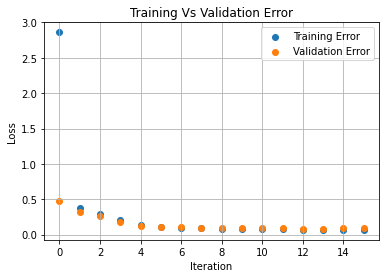

In [88]:
plt.scatter(x=history.epoch,y=history.history['loss'],label='Training Error')
plt.scatter(x=history.epoch,y=history.history['val_loss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [89]:
# Compare actual vs predicted performance with dataset not seen by the model before
df = pd.read_csv(validation_file,names=columns)

In [90]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [91]:
result = model.predict(X_validation_encoded)

In [92]:
result[:5]

array([[5.942887 ],
       [5.9290056],
       [1.0939775],
       [3.753022 ],
       [3.989008 ]], dtype=float32)

In [93]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [94]:
df['count_predicted'] = result

In [95]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,5.942887
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,5.929006
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,1.093977
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,3.753022
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,3.989008


In [96]:
df['count_predicted'].describe()

count    3266.000000
mean        4.533648
std         1.377818
min         0.503877
25%         3.711230
50%         4.934112
75%         5.538595
max         6.974541
Name: count_predicted, dtype: float64

In [97]:
df['count'] = df['count'].map(np.expm1)
df['count_predicted'] = df['count_predicted'].map(np.expm1)

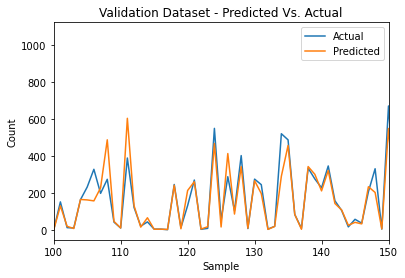

In [98]:
# Actual Vs Predicted
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

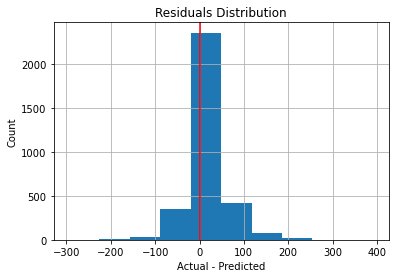

In [99]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [100]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.65
 Over  Estimation: 0.35


In [101]:
import sklearn.metrics as metrics
print("RMSE: {0:.2f}".format(metrics.mean_squared_error(df['count'],
                                                    df['count_predicted'])**.5))

RMSE: 49.04


In [102]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [103]:
print("RMSLE: {0:.2f}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE: 0.30


# Submission

In [104]:
# Optional Test Data
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [105]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [106]:
# Transform data first with column transformer
result = model.predict(colTransformer.transform(X_test))

In [107]:
result[:5]

array([[2.1740057 ],
       [1.5472378 ],
       [0.9286502 ],
       [0.72078526],
       [0.6660508 ]], dtype=float32)

In [108]:
# Convert result to actual count
df_test["count"] = np.expm1(result)

In [109]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,7.793438
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,3.698474
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,1.531090
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,1.056047
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,0.946535


In [110]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [111]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
96,2011-01-24 03:00:00,1,0,1,1,1.64,1.515,45,16.9979,2011,1,24,0,3,-0.01381


In [112]:
df_test['count'] = df_test['count'].map(adjust_count)

In [113]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count


In [114]:
df_test[['datetime','count']].to_csv('Mew_Insight_Keras_Predicted_Count.csv',index=False)